# Análisis de Reglas de Asociación en un Dataset de Compras

Este proyecto tiene como objetivo aplicar técnicas de minería de datos, específicamente reglas de asociación. Utilizaremos el algoritmo Apriori para descubrir patrones frecuentes en las compras realizadas por los clientes.

El trabajo se ha dividido en varias fases: carga y preprocesado, exploración, aplicación del algoritmo y análisis de resultados.

In [3]:
# Importación de librerías
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt


# Configurar matplotlib para evitar warnings relacionados con fuentes
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

## Parte 1: Carga y Preprocesamiento de Datos

En esta sección se realiza la exploración inicial y limpieza del dataset para prepararlo para el algoritmo Apriori. Se cargan los datos desde un archivo CSV, transformando cada transacción en una lista de productos y eliminando valores vacíos. Se identifican los productos únicos y se crea un DataFrame binario donde cada fila representa una transacción y cada columna un producto, indicando con 1 si el producto está presente.

In [4]:
# Lectura del archivo CSV
df = pd.read_csv('groceries.csv', sep=";", header= None)
df.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [5]:
# Tamaño y estructura
print(df.shape)

df.info()

(9835, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
dtypes: object(1)
memory usage: 77.0+ KB


In [6]:
# Carga de datos y limpieza básica
dataset = []
for line in df.values:
    items = line[0].strip().split(',') 
    items = [item for item in items if item != '']
    dataset.append(items)

# Mostrar cuántas transacciones hay
print(f"Número total de transacciones: {len(dataset)}")

Número total de transacciones: 9835


In [7]:
# Crear un conjunto para almacenar los productos únicos de todas las transacciones
productos_unicos = set(item for transaccion in dataset for item in transaccion)

# Convertir el conjunto a una lista
productos_unicos_lista = list(productos_unicos)

# Mostrar los productos únicos
print(f"Número total de productos únicos: {len(productos_unicos_lista)}")


Número total de productos únicos: 171


In [8]:
# Convertir la lista a un DataFrame
apriori_df = pd.DataFrame(columns=productos_unicos_lista)

# Mostrar el DataFrame
apriori_df

,candy,sauces,curd cheese,Instant food products,cocoa drinks,softener,canned fish,pickled vegetables,fish,pet care,...,pip fruit,beverages,UHT-milk,sparkling wine,meat,candles,rum,liquor,dental care,photo/film


In [9]:
# Crear un DataFrame vacío con las columnas de productos únicos
apriori1 = pd.DataFrame(0, index=range(len(dataset)), columns=productos_unicos_lista)
apriori1 = apriori1.astype(bool)

# Rellenar el DataFrame con True si el producto está presente en la transacción, False en caso contrario
for i, transaction in enumerate(dataset):
    apriori1.loc[i, transaction] = True


# Mostrar el DataFrame que se usará en el algoritmo Apriori
apriori1.head()


,candy,sauces,curd cheese,Instant food products,cocoa drinks,softener,canned fish,pickled vegetables,fish,pet care,...,pip fruit,beverages,UHT-milk,sparkling wine,meat,candles,rum,liquor,dental care,photo/film
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
apriori1.shape

(9835, 171)

In [11]:
apriori1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 171 entries, candy to photo/film
dtypes: bool(171)
memory usage: 1.6 MB


## Parte 2: Exploración de los Datos

En esta fase, se realiza un análisis exploratorio del conjunto de datos para comprender mejor su estructura y características. Se llevan a cabo diversas tareas de análisis y visualización de datos. Estas incluyen la exploración de las transacciones, el análisis de la frecuencia de los productos, la visualización de los productos más comprados, el cálculo de porcentajes de compra, y el análisis de patrones en las compras.

Longitud media de las transacciones: 4.41 productos


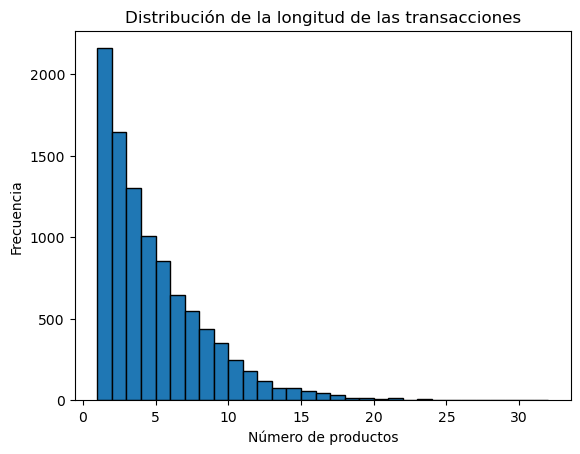

In [12]:
# Exploración de las transacciones
# Media de la longitud de las transacciones
longitudes = [len(transaccion) for transaccion in dataset]
print(f"Longitud media de las transacciones: {sum(longitudes)/len(longitudes):.2f} productos")

# Visualización de la longitud de las transacciones
plt.hist(longitudes, bins=range(1, max(longitudes)+1), edgecolor='black')
plt.title("Distribución de la longitud de las transacciones")
plt.xlabel("Número de productos")
plt.ylabel("Frecuencia")
plt.show()


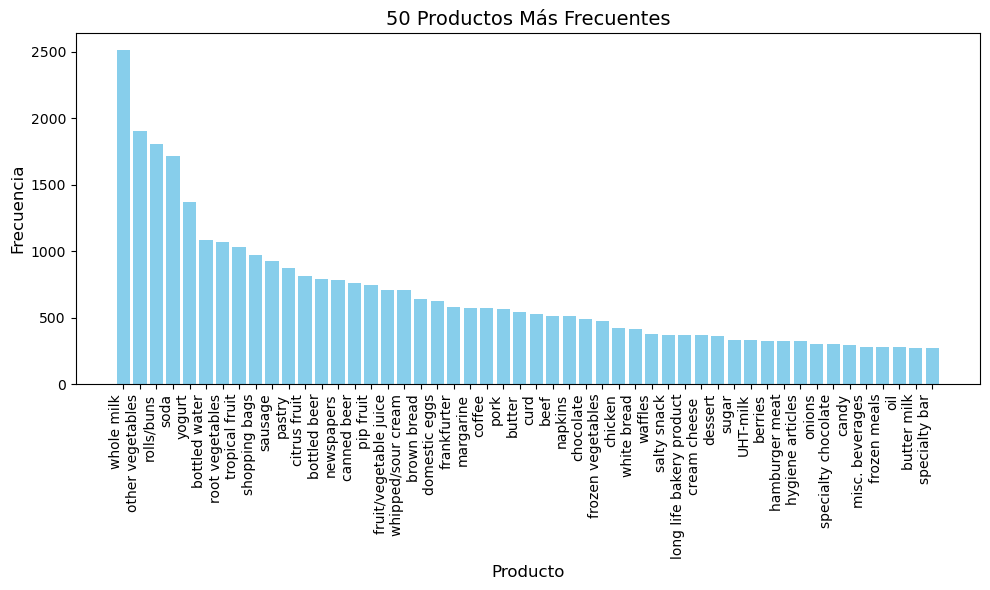

In [13]:
# Análisis de frecuencia de productos
items_series = pd.Series([item for sublist in dataset for item in sublist])
frecuencia_productos = items_series.value_counts().reset_index()
frecuencia_productos.columns = ['Producto', 'Frecuencia']

# Crear una gráfica de barras para visualizar las frecuencias de los productos
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_productos['Producto'][:50], frecuencia_productos['Frecuencia'][:50], color='skyblue')
plt.title('50 Productos Más Frecuentes', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Calcular la cantidad de artículos comprados y no comprados
comprados = apriori1.sum(axis=0)
no_comprados = len(apriori1) - comprados

# Crear un DataFrame para mostrar los resultados
compras_producto = pd.DataFrame({
    'Purchased': comprados,
    'Not Purchased': no_comprados,
})

# Ordernar el DataFrame por la cantidad de productos comprados
compras_producto = compras_producto.sort_values(by='Purchased', ascending=False)

compras_producto

,Purchased,Not Purchased
whole milk,2513,7322
other vegetables,1903,7932
rolls/buns,1809,8026
soda,1715,8120
yogurt,1372,8463
...,...,...
bags,4,9831
kitchen utensil,4,9831
preservation products,2,9833
sound storage medium,1,9834


In [15]:
# Añadir el porcentaje de compras de cada producto
compras_producto['Purchase Percentage'] = (compras_producto['Purchased'] / sum(compras_producto['Purchased'])) * 100
compras_producto.head()


,Purchased,Not Purchased,Purchase Percentage
whole milk,2513,7322,5.794729
other vegetables,1903,7932,4.388129
rolls/buns,1809,8026,4.171375
soda,1715,8120,3.954620
yogurt,1372,8463,3.163696


In [16]:
# Calcular la media del porcentaje de compras
media_porcentaje_compras = compras_producto['Purchase Percentage'].mean()
print(f"La media del porcentaje de productos comprados es: {media_porcentaje_compras:.2f}%")

La media del porcentaje de productos comprados es: 0.58%


## Parte 3: Aplicación del Algoritmo y Análisis

En esta sección se aplica el algoritmo de reglas de asociación **Apriori** al dataset transaccional preprocesado.  
El objetivo es descubrir combinaciones frecuentes de productos que suelen comprarse juntos, con el fin de generar reglas útiles para estrategias comerciales, como promociones cruzadas o reubicación de productos en tienda.

In [17]:
# Aplicamos Apriori sobre la tabla binaria (apriori1)
frequent_itemsets = apriori(apriori1, 
                            min_support=0.03, 
                            use_colnames=True)

# Mostramos los itemsets frecuentes ordenados por soporte
print("Itemsets frecuentes encontrados:")
frequent_itemsets.sort_values(by="support", ascending=False).head(10)

Itemsets frecuentes encontrados:


,support,itemsets
36,0.255516,(whole milk)
26,0.193493,(other vegetables)
14,0.183935,(rolls/buns)
0,0.174377,(soda)
3,0.139502,(yogurt)
28,0.110524,(bottled water)
8,0.108998,(root vegetables)
11,0.104931,(tropical fruit)
5,0.098526,(shopping bags)
32,0.093950,(sausage)


In [71]:
# Generamos las reglas con un umbral de confianza mínimo de 40%
rules = association_rules(frequent_itemsets, 
                          metric="confidence", 
                          min_threshold=0.3)

# Mostramos las reglas ordenadas por lift
print("Reglas de asociación generadas:")
rules.sort_values(by='lift', ascending=False).head()

Reglas de asociación generadas:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
6,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,1.0,0.013324,1.210344,0.480506,0.123766,0.173788,0.246074
4,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,1.0,0.015589,1.225796,0.485239,0.136716,0.184204,0.263775
11,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.0,0.013916,1.352735,0.465077,0.109273,0.260757,0.287895
3,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.0,0.021056,1.350401,0.483202,0.154961,0.259479,0.320049


Para centrarnos en las reglas más útiles desde el punto de vista comercial, aplicamos los siguientes filtros:
- **Lift > 1**: Relación significativa entre los productos.
- **Confianza > 0.3**: Alta probabilidad condicional.
- **Soporte > 0.03**: Presencia mínima en al menos el 3% de las transacciones.

Esto nos permite identificar las combinaciones más fuertes y frecuentes de productos.

In [72]:
# Aplicamos los filtros mencionados
filtered_rules = rules[(rules['lift'] > 1) & 
                       (rules['confidence'] > 0.3) & 
                       (rules['support'] > 0.03)]

# Mostramos las reglas filtradas ordenadas por lift
filtered_rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
6,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,1.0,0.013324,1.210344,0.480506,0.123766,0.173788,0.246074
4,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,1.0,0.015589,1.225796,0.485239,0.136716,0.184204,0.263775
11,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,1.0,0.013916,1.352735,0.465077,0.109273,0.260757,0.287895
3,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,1.0,0.021056,1.350401,0.483202,0.154961,0.259479,0.320049
0,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,1.0,0.016424,1.170929,0.439613,0.149930,0.145977,0.267804
5,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,1.0,0.015486,1.247252,0.409045,0.132950,0.198238,0.284320
1,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
13,(pip fruit),(whole milk),0.075648,0.255516,0.030097,0.397849,1.557043,1.0,0.010767,1.236375,0.387036,0.099966,0.191184,0.257818
10,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817


Las relaciones entre productos las visualizaremos mediante un grafo dirigido, donde:
- Los nodos representan productos individuales.
- Las flechas representan reglas de asociación (de antecedente a consecuente).
- El peso de la flecha indica la fuerza de la relación (medida por el lift).


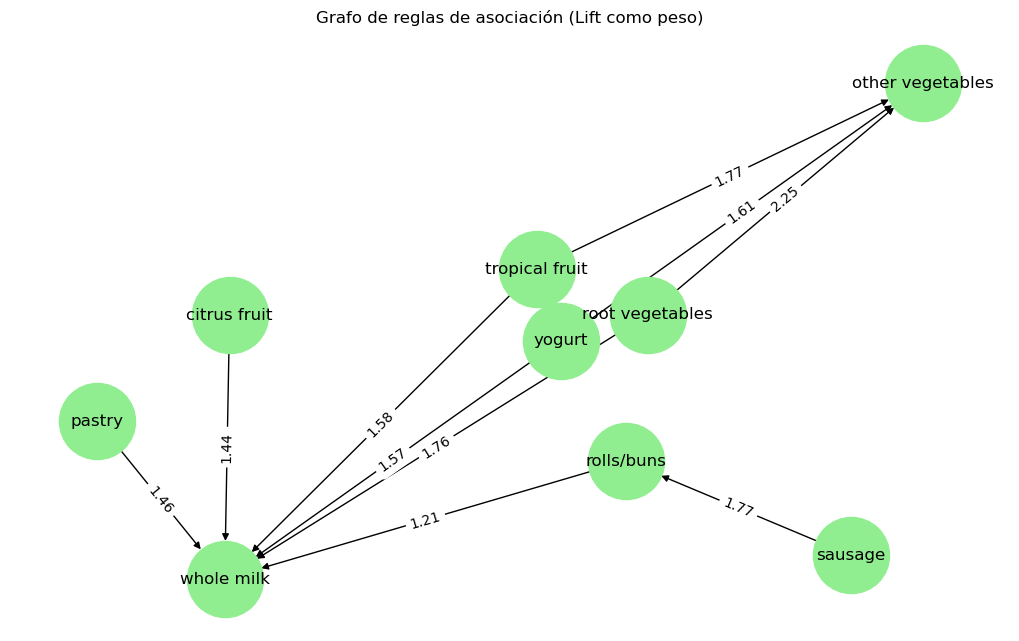

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

# Seleccionamos las primeras 10 reglas para graficar
rules_to_plot = filtered_rules.head(10)

# Creamos un grafo dirigido
G = nx.DiGraph()

for _, rule in rules_to_plot.iterrows():
    for ant in rule['antecedents']:
        for cons in rule['consequents']:
            G.add_edge(ant, cons, weight=rule['lift'])

# Dibujamos el grafo
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=1)
edges = G.edges(data=True)

# Pesos de las aristas (lift)
weights = [d['weight'] for (_, _, d) in edges]

# Dibujar nodos y etiquetas
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

plt.title('Grafo de reglas de asociación (Lift como peso)')
plt.show()


## Parte 4: Interpretación de Resultados y Conclusiones

### ¿Qué significan las reglas que hemos obtenido?

Después de aplicar el algoritmo Apriori al dataset de compras de supermercado, se generaron varias reglas de asociación. Estas reglas nos dicen qué productos se compran juntos con frecuencia. Por ejemplo:

- **Whole milk → Yogurt**  
  Esto quiere decir que muchas personas que compran *leche entera* también compran *yogur*.  
  - Soporte: 7.4% (ocurre en el 7.4% de las compras totales)
  - Confianza: 38% (de cada 100 personas que compran leche, 38 también compran yogur)
  - Lift: 1.57 (es 1.57 veces más probable que se compren juntos que si fueran productos independientes)

- **Root vegetables → Whole milk**  
  Quienes compran *verduras frescas* también tienden a llevar *leche entera*.
  - Confianza del 42%, un valor bastante alto.

- **Yogurt → Whole milk**  
  También se ve que mucha gente que compra yogur lleva leche entera. Es decir, se refuerza la conexión entre estos dos productos.

### ¿Qué tan útiles son estas reglas?

Estas reglas nos ayudan a entender el comportamiento de los clientes. Por ejemplo:

- **La leche entera parece ser un producto clave**, ya que aparece en varias reglas como producto relacionado.
- Podemos suponer que los clientes que compran productos “frescos” o “saludables” también tienden a comprar leche o yogur.
- Estos patrones se pueden usar para tomar decisiones dentro del supermercado.




### Recomendaciones prácticas

A partir de estas observaciones, podemos hacer algunas sugerencias para un supermercado:

1. **Colocar productos juntos**  
   Si sabemos que la leche y el yogur se compran juntos, ponerlos cerca en las estanterías puede facilitar y fomentar su compra.

2. **Ofertas combinadas o promociones**  
   Por ejemplo, ofrecer un pequeño descuento si se compran “yogur + leche entera”, ya que es algo que muchos clientes ya hacen.

3. **Campañas de marketing dirigidas**  
   Si alguien suele comprar verduras frescas, podemos sugerirle comprar leche o productos similares (por ejemplo, con cupones personalizados).




### Evaluación crítica de las reglas

- Las reglas encontradas **tienen sentido lógico** y no parecen ser aleatorias.
- Algunas reglas se **repiten en dirección inversa** (por ejemplo: leche → yogur y yogur → leche), lo cual es normal pero puede parecer redundante.
- No se detectaron reglas con soporte muy bajo, lo cual es bueno porque **evitamos patrones poco comunes** que no aportan valor.




### Conclusión final

El análisis de reglas de asociación ha sido útil para descubrir **patrones interesantes en las compras** de supermercado. Nos ha permitido ver relaciones reales entre productos que los clientes compran juntos. Con esta información, un supermercado puede **mejorar la distribución de productos, diseñar promociones efectivas y entender mejor a sus clientes.**

Este proyecto demuestra cómo los datos, bien analizados, pueden ayudarnos a tomar mejores decisiones.